In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib as mpl
import numpy.linalg as la
import matplotlib.style as style

mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['font.family'] = 'STIXGeneral'
# print(mpl.rcParams['font.size'])
mpl.rcParams['font.size'] = 19

# Crypten

In [44]:
crypten_data = pd.read_csv('../eab-nn-experiments/crypten_experiments/datasize_nn.csv',
                           skiprows=(lambda x: (x % 2 != 0)),
                           header=None,
                           )
# epoch_duration, epoch, batch_size, data_size, accuracy, test_duration
crypten_data.columns = ['epoch_duration', 'epoch', 'batch_size', 'data_size', 'accuracy', 'test_duration']

# crypten_data = crypten_data.drop(index=range(14))
crypten_data['total_time'] = crypten_data['epoch_duration'] + crypten_data['test_duration']

print(crypten_data)

mean_crypten = crypten_data.groupby('data_size')['total_time'].sum()
print(mean_crypten)

# stdev_crypten = crypten_data.groupby('data_size')['epoch_duration'].std()
# print(stdev_crypten)

    epoch_duration  epoch  batch_size  data_size  accuracy  test_duration  \
0       334.103506      0          64       7500    0.1213     115.350260   
1       330.811416      1          64       7500    0.1621     115.805684   
2       330.879101      2          64       7500    0.2365     115.004239   
3       663.143592      0          64      15000    0.1244     117.321772   
4       668.208064      1          64      15000    0.1715     117.992892   
5       667.907569      2          64      15000    0.3042     116.648248   
6      1315.456388      0          64      30000    0.2173     114.857552   
7      1313.133419      1          64      30000    0.2820     116.150094   
8      1328.334851      2          64      30000    0.4606     114.715113   
9      2537.499688      0          64      60000    0.3578     115.763435   
10     2612.373227      1          64      60000    0.5357     128.444723   
11     2707.107256      2          64      60000    0.5746     115.908757   

# Secretflow

In [45]:
sf_data = pd.read_csv('../secretflow-experiments/mnist_2p_datasize.csv', header=None)

# 314.24218058993574,64,7500,0.0936
# total time, batch_size, data_size, accuracy
sf_data.columns = ['total_time', 'batch_size', 'data_size', 'accuracy']
print(sf_data)

sf_mean = sf_data.groupby('data_size')['total_time'].mean()
print(sf_mean)

sf_stdev = sf_data.groupby('data_size')['total_time'].std()
print(sf_stdev)

     total_time  batch_size  data_size  accuracy
0    314.242181          64       7500    0.0936
1    312.234953          64       7500    0.3633
2    313.047952          64       7500    0.2754
3    311.484159          64       7500    0.3551
4    308.496396          64       7500    0.2465
5    309.880335          64       7500    0.1122
6    311.431296          64       7500    0.3600
7    312.348996          64       7500    0.2622
8    310.806543          64       7500    0.2740
9    312.474008          64       7500    0.3242
10   309.268287          64       7500    0.2240
11   603.688385          64      15000    0.4487
12   602.104592          64      15000    0.2645
13   599.996986          64      15000    0.3958
14   600.714083          64      15000    0.4254
15   594.164933          64      15000    0.3715
16   599.535114          64      15000    0.4189
17   604.220654          64      15000    0.4429
18   596.630378          64      15000    0.4929
19   604.567340     

# Plaintext Torch

In [46]:
torch_data = pd.read_csv('../eab-nn-experiments/torch_experiments/mnist/mnist_total_time.csv',
                         header=None,
                         )
torch_data.columns = ['total_duration', 'data_size']

# print(torch_data)

torch_medians = torch_data.groupby('data_size')['total_duration'].median()
print(torch_medians)
torch_stdev = torch_data.groupby('data_size')['total_duration'].std()
print(torch_stdev)

data_size
7500      2.626104
15000     3.858952
30000     6.377122
60000    11.345573
Name: total_duration, dtype: float64
data_size
7500     0.022370
15000    0.030360
30000    0.044144
60000    0.045929
Name: total_duration, dtype: float64


# NVFlare

In [47]:
nvflare_medians = []
nvflare_stdevs = []
for datasize in [7500, 15000, 30000, 60000]:
    nvflare_data = pd.read_csv(f'../eab-nvflare-experiments/fl-nn/experiments/mnist/{datasize}/total_time.csv',
                header=None,
                )
    # total_duration, run_id, timestamp
    nvflare_data.columns = ['total_duration', 'run_id', 'timestamp']
    nvflare_medians.append(nvflare_data['total_duration'].median())
    nvflare_stdevs.append(nvflare_data['total_duration'].std())
print(nvflare_medians)
print(nvflare_stdevs)

[np.float64(32.1772215), np.float64(35.0571565), np.float64(38.004146), np.float64(43.956458)]
[np.float64(0.3470507609049593), np.float64(1.0130758237605801), np.float64(0.3052995578776146), np.float64(0.28762160001194825)]


# Data Station

In [48]:
ds_data = pd.read_csv('../datastation-escrow/examples/training_scenario/mnist/mnist_total_time.csv',
                        header=None,
                        )
# total_duration, data_size
ds_data.columns = ['total_duration', 'data_size']

ds_medians = ds_data.groupby('data_size')['total_duration'].median()
ds_stdevs = ds_data.groupby('data_size')['total_duration'].std()

print(ds_medians)
print(ds_stdevs)

data_size
7500      7.317240
15000     8.502715
30000    10.905158
60000    15.664348
Name: total_duration, dtype: float64
data_size
7500     0.172851
15000    0.049639
30000    0.095084
60000    0.155105
Name: total_duration, dtype: float64


# Plotting with Matplotlib

In [54]:
def calculate_x_placements(X_axis, width, n_bars):
    """
    Returns the x placements for a bar in a grouped bar chart, as a list of x placements.
    """
    placements = []
    for index in range(n_bars):
        # calculate x placement as floating point number
        offset = (index - (n_bars - 1) / 2.0) * width
        placements.append(X_axis + offset)
    return placements

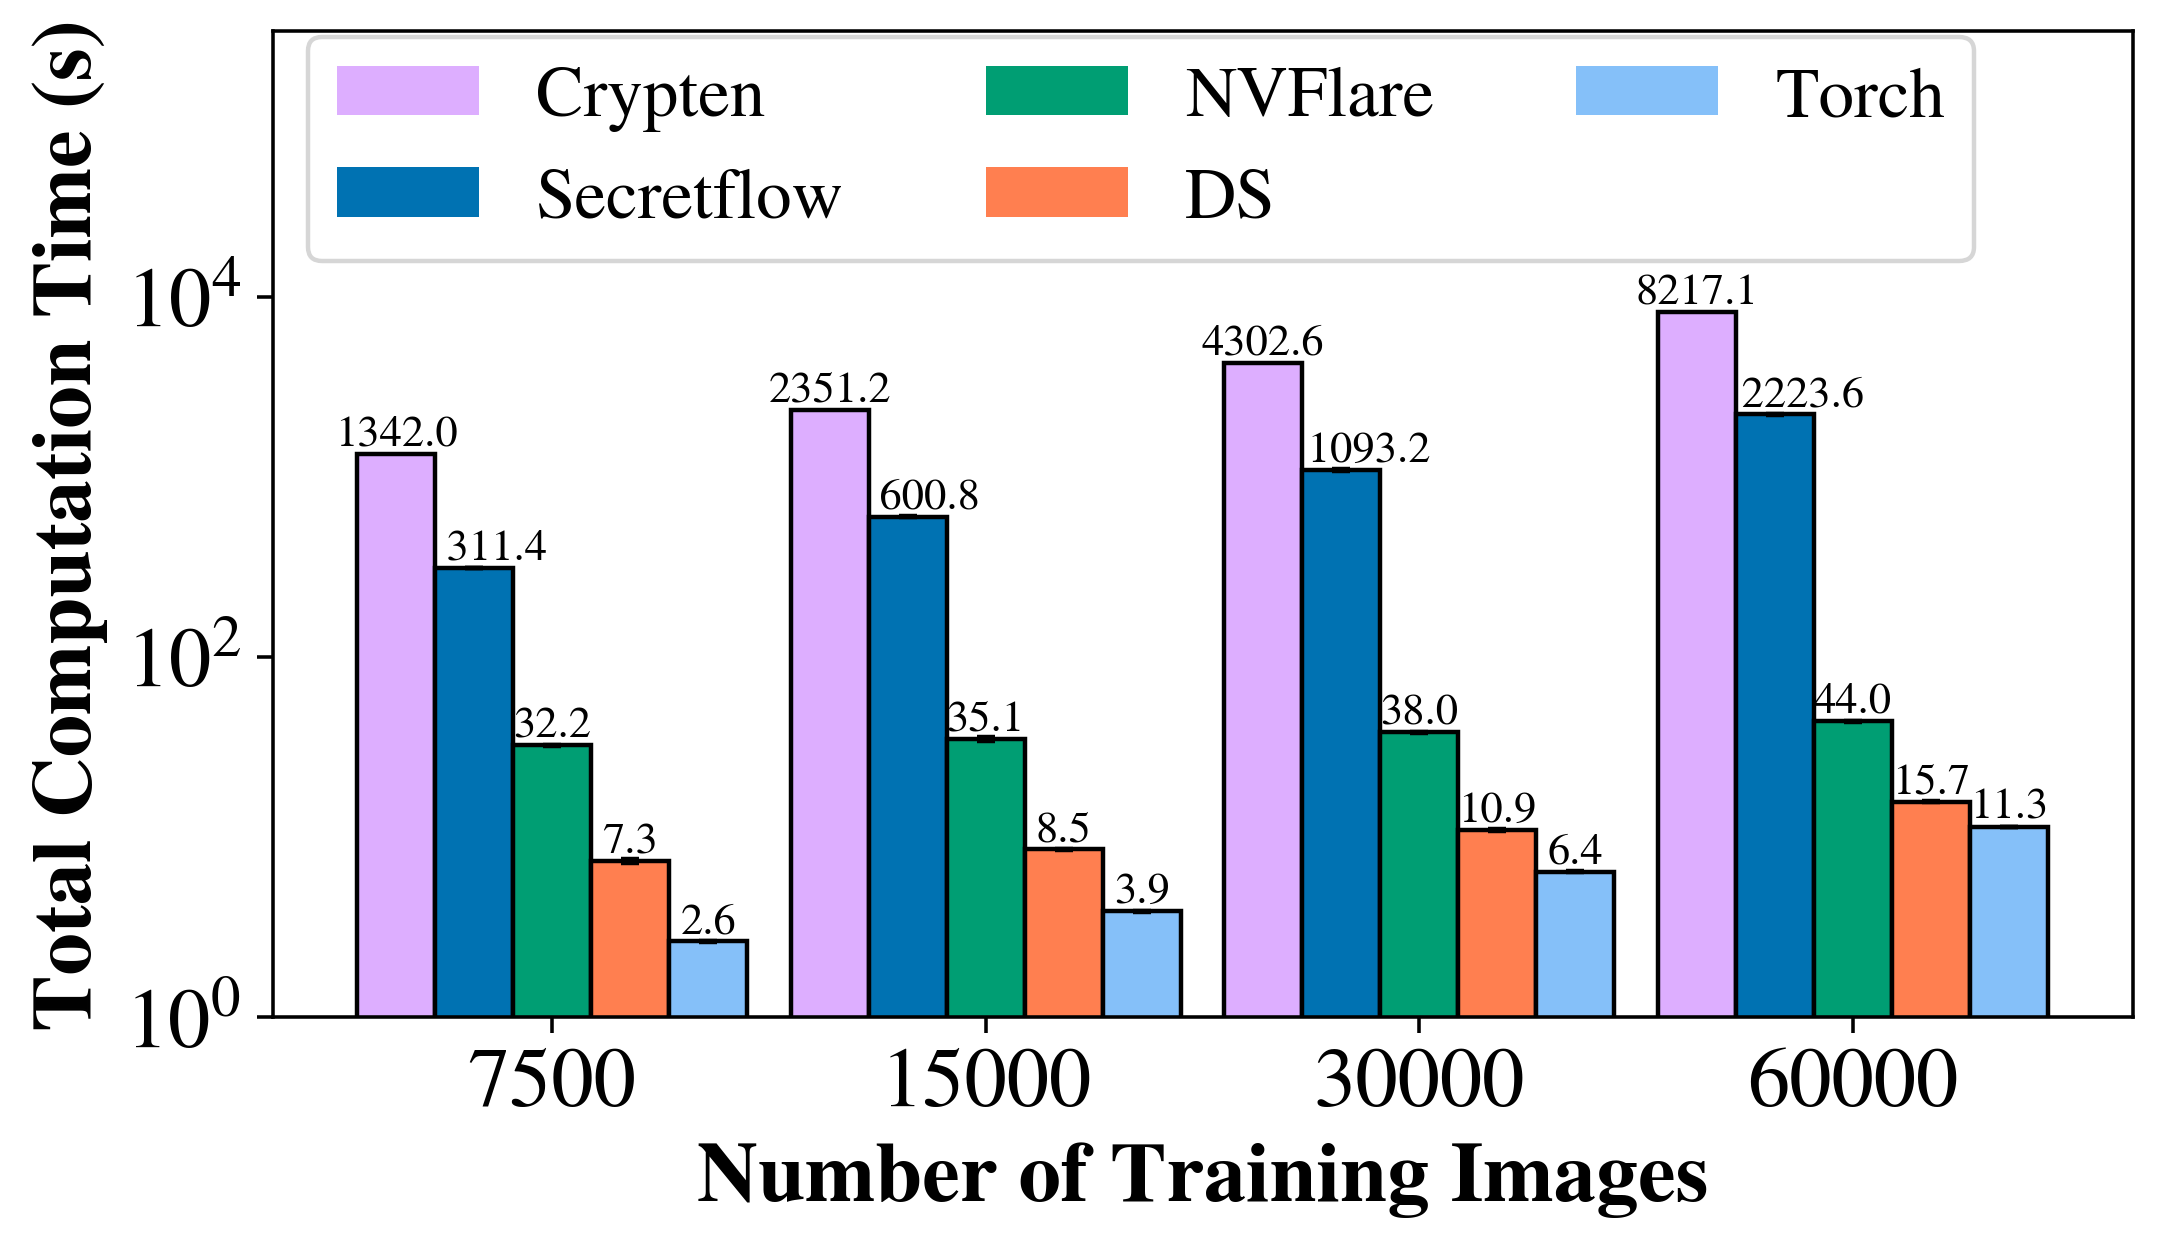

In [80]:
bar_label_font_size = 10
X_axis = np.arange(4)+1
width = 0.18
num_bars = 5
padding = 4


ax = plt.figure(figsize=(7.5, 4), dpi=320)

x_placements = calculate_x_placements(X_axis, width, num_bars)


# Crypten
crypten_bar = plt.bar(x=x_placements[0], width=width, height = mean_crypten, label = "Crypten", color='#ddaeff')
plt.bar(x=x_placements[0], width=width, height=mean_crypten,
        # yerr=conclave_stdevs,
        edgecolor='black',
        error_kw={"elinewidth":1,"capsize":2,"capthick":1},
        color='none'
        )
crypten_label = map(lambda n: '{0:.1f}'.format(n),mean_crypten)
plt.bar_label(crypten_bar, crypten_label, fontsize=bar_label_font_size)

# Secretflow
sf_bar = plt.bar(x=x_placements[1], width=width, height = sf_mean, label = "Secretflow", color='#0072b2')
plt.bar(x=x_placements[1], width=width, height=sf_mean,
        yerr=sf_stdev,
        edgecolor='black',
        error_kw={"elinewidth":1,"capsize":2,"capthick":1},
        color='none'
        )
# add spaces based on number of digits in label
def dynamic_space_label(n):
    int_digits = len(str(int(abs(n))))
    # space_per_digit can be 1, 2, or more
    space_per_digit = 1
    total_spaces = int_digits * space_per_digit
    return ' ' * total_spaces + ' {:.1f}'.format(n)

sf_label = list(map(dynamic_space_label, sf_mean))
plt.bar_label(sf_bar, sf_label, fontsize=bar_label_font_size
            #   , rotation=0, padding=padding
              )
# for bar in sf_bar:
#     ax.text(
#         bar.get_x() + bar.get_width() / 2 + 0.5,
#         bar.get_height(),
#         f'{bar.get_height()}',
#         ha='center',
#         va='bottom'
#     )

# NVFlare
nvflare_bar = plt.bar(x=x_placements[2], width=width, height = nvflare_medians, label = "NVFlare", color='#009E73')
plt.bar(x=x_placements[2], width=width, height=nvflare_medians, yerr=nvflare_stdevs,
        edgecolor='black',
        error_kw={"elinewidth":1,"capsize":2,"capthick":1},
        color='none'
        )
nvflare_label = map(lambda n: '{0:.1f}'.format(n),nvflare_medians)
plt.bar_label(nvflare_bar, nvflare_label, fontsize=bar_label_font_size)


# Data Station
ds_bar = plt.bar(x=x_placements[3], width=width, height = ds_medians, label = "DS", color='coral')
plt.bar(x=x_placements[3], width=width, height=ds_medians, yerr=ds_stdevs,
        edgecolor='black',
        error_kw={"elinewidth":1,"capsize":2,"capthick":1},
        color='none'
        )
ds_label = map(lambda n: '{0:.1f}'.format(n),ds_medians)
plt.bar_label(ds_bar, ds_label, fontsize=bar_label_font_size)

# Torch
torch_bar = plt.bar(x=x_placements[4], width=width, height = torch_medians, label = "Torch", color='#85C0F9')
plt.bar(x=x_placements[4], width=width, height=torch_medians,
        yerr=torch_stdev,
        edgecolor='black',
        error_kw={"elinewidth":1,"capsize":2,"capthick":1},
        color='none'
        )
torch_label = map(lambda n: '{0:.1f}'.format(n),torch_medians)
plt.bar_label(torch_bar, torch_label, fontsize=bar_label_font_size)

plt.yscale('log')
plt.ylim(1, 300000)

plt.xlabel("Number of Training Images", fontweight="bold")
plt.ylabel("Total Computation Time (s)", fontweight="bold")
# plt.title("Basic NN Training Time on FashionMNIST")
plt.legend(ncols=3, loc='upper left',bbox_to_anchor=(0.0,1.03), fontsize=16)

plt.xticks(X_axis, ["7500", "15000", "30000", "60000"])

plt.savefig("datasize_mnist_nn.pdf", bbox_inches='tight')

plt.show()

# Accuracy

## Data Station

In [51]:
ds_acc = pd.read_csv('../datastation-escrow/examples/training_scenario/mnist/mnist.csv',
                        # header=None,
                        )

ds_acc = ds_acc[ds_acc['epoch'] == '2']
ds_acc['accuracy'] = ds_acc['accuracy'].astype('float')
# print(ds_acc)
# print(ds_acc.dtypes)


ds_acc_medians = ds_acc.groupby('data_size')['accuracy'].median()
ds_acc_stdevs = ds_acc.groupby('data_size')['accuracy'].std()

print(ds_acc_medians)
print(ds_acc_stdevs)

data_size
15000    0.3598
30000    0.5457
60000    0.6117
7500     0.2913
Name: accuracy, dtype: float64
data_size
15000    0.071803
30000    0.033314
60000    0.015116
7500     0.092943
Name: accuracy, dtype: float64


In [52]:
ds_acc = pd.read_csv('../datastation-escrow/examples/training_scenario/mnist/mnist.csv',
                        # header=None,
                        )

ds_acc = ds_acc[ds_acc['epoch'] == '1']
ds_acc['accuracy'] = ds_acc['accuracy'].astype('float')
# print(ds_acc)
# print(ds_acc.dtypes)


ds_acc_medians = ds_acc.groupby('data_size')['accuracy'].median()
ds_acc_stdevs = ds_acc.groupby('data_size')['accuracy'].std()

print(ds_acc_medians)
print(ds_acc_stdevs)

data_size
15000    0.3221
30000    0.4542
60000    0.5846
7500     0.2275
Name: accuracy, dtype: float64
data_size
15000    0.078324
30000    0.053083
60000    0.041880
7500     0.073946
Name: accuracy, dtype: float64


## Plaintext

In [53]:
torch_acc = pd.read_csv('../chz-eab-nn-experiments/torch_experiments/mnist/mnist.csv',)

# epoch_duration, epoch, batch_size, data_size, accuracy, test_duration
torch_acc.columns = ['epoch_duration', 'epoch', 'batch_size', 'data_size', 'accuracy', 'test_duration']
torch_acc = torch_acc[torch_acc['epoch'] == 2]

torch_acc_medians = torch_acc.groupby('data_size')['accuracy'].median()
print(torch_acc_medians)
torch_acc_stdevs = torch_acc.groupby('data_size')['accuracy'].std()
print(torch_acc_stdevs)

FileNotFoundError: [Errno 2] No such file or directory: '../chz-eab-nn-experiments/torch_experiments/mnist/mnist.csv'

In [ ]:
torch_acc = pd.read_csv('../chz-eab-nn-experiments/torch_experiments/mnist/mnist.csv',)

# epoch_duration, epoch, batch_size, data_size, accuracy, test_duration
torch_acc.columns = ['epoch_duration', 'epoch', 'batch_size', 'data_size', 'accuracy', 'test_duration']
torch_acc = torch_acc[torch_acc['epoch'] == 1]

torch_acc_medians = torch_acc.groupby('data_size')['accuracy'].median()
print(torch_acc_medians)
torch_acc_stdevs = torch_acc.groupby('data_size')['accuracy'].std()
print(torch_acc_stdevs)

data_size
7500     0.2328
15000    0.2965
30000    0.4447
60000    0.5831
Name: accuracy, dtype: float64
data_size
7500     0.049523
15000    0.074485
30000    0.056989
60000    0.025669
Name: accuracy, dtype: float64


## NVFlare

In [ ]:
nvflare_acc_medians = []
nvflare_acc_stdevs = []
for datasize in [7500, 15000, 30000, 60000]:
    nvflare_acc = pd.read_csv(f'../chz-eab-nvflare-experiments/fl-nn/experiments/mnist/{datasize}/datasize_mnist_nn.csv',)
    nvflare_acc.columns = ['accuracy', 'epoch', 'batch_size', 'data_size', 'site']

    nvflare_acc = nvflare_acc[nvflare_acc['batch_size'] != 64.0]
    nvflare_acc = nvflare_acc[nvflare_acc['site'] == 'site-1']
    # print(nvflare_acc)
    
    # get every third element
    nvflare_acc = nvflare_acc.iloc[::3, :]
    # print(nvflare_acc)

    nvflare_acc_median = nvflare_acc['accuracy'].median()
    nvflare_acc_medians.append(nvflare_acc_median)
    
    nvflare_acc_stdev = nvflare_acc['accuracy'].std()
    nvflare_acc_stdevs.append(nvflare_acc_stdev)

print(nvflare_acc_medians)
print(nvflare_acc_stdevs)

[np.float64(0.1473), np.float64(0.25225), np.float64(0.42655), np.float64(0.5260499999999999)]
[np.float64(0.063832949520169), np.float64(0.05585363412030093), np.float64(0.06172896312825032), np.float64(0.03017825560086452)]


## Crypten

In [ ]:
crypten_acc = crypten_data[crypten_data['epoch'] == 2]
crypten_acc_medians = crypten_acc.groupby('data_size')['accuracy'].median()
print(crypten_acc_medians)

data_size
7500     0.2365
15000    0.3042
30000    0.4606
60000    0.5746
Name: accuracy, dtype: float64


In [ ]:
# Data Parsing for output
for idx, a in enumerate([7500, 15000, 30000, 60000]):
    crypten_acc_median = crypten_acc_medians[a]
    nvflare_acc_median = nvflare_acc_medians[idx]
    ds_acc_median = ds_acc_medians[str(a)]
    torch_acc_median = torch_acc_medians[a]
    
    nvflare_acc_stdev = nvflare_acc_stdevs[idx]
    ds_acc_stdev = ds_acc_stdevs[str(a)]
    torch_acc_stdev = torch_acc_stdevs[a]
    out = f"MNIST 2-Agent {a} & ${crypten_acc_median:.4f}$ & \makecell{{${nvflare_acc_median:.4f}$\\\\$\pm {nvflare_acc_stdev:.4f}$}} & \makecell{{${ds_acc_median:.4f}$\\\\$\pm {ds_acc_stdev:.4f}$}} & \makecell{{${torch_acc_median:.4f}$\\\\$\pm {torch_acc_stdev:.4f}$}} \\\\"
    print(out)
    print("\hline")

MNIST 2-Agent 7500 & $0.2365$ & \makecell{$0.1473$\\$\pm 0.0638$} & \makecell{$0.2275$\\$\pm 0.0739$} & \makecell{$0.2328$\\$\pm 0.0495$} \\
\hline
MNIST 2-Agent 15000 & $0.3042$ & \makecell{$0.2522$\\$\pm 0.0559$} & \makecell{$0.3221$\\$\pm 0.0783$} & \makecell{$0.2965$\\$\pm 0.0745$} \\
\hline
MNIST 2-Agent 30000 & $0.4606$ & \makecell{$0.4265$\\$\pm 0.0617$} & \makecell{$0.4542$\\$\pm 0.0531$} & \makecell{$0.4447$\\$\pm 0.0570$} \\
\hline
MNIST 2-Agent 60000 & $0.5746$ & \makecell{$0.5260$\\$\pm 0.0302$} & \makecell{$0.5846$\\$\pm 0.0419$} & \makecell{$0.5831$\\$\pm 0.0257$} \\
\hline


In [ ]:
# Data Parsing for output, pivoted table